<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/EDOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos para a solução de EDOs

Nesta unidade, vamos estudar os método de passo único, explícitos e implícitos para aproximar a solução de Equações Diferenciais Ordinárias (EDOs). Além disso, também estudaremos a aplicação destes métodos para a solução de um sistema de EDOs.

O Problema de Valor Inicial é dado por,

$$\begin{array}{ll}
\dfrac{dy}{dt} = f(t,y), & t\in [t_0,t_F]\\ \\
y(t_0) = y_0, & \\
\end{array}$$
ond $f(t,y)$ é uma função contínua, dada pelo problema e $y_0$ é a condição inicial.

**Método de Euler**

Deduzido a partir da expansão da solução em Série de Taylor:

$$y(t+\Delta t) = y(t)+\Delta t y'(t) + \Delta t^2 y''(t) + O(\Delta t^3)$$

Assim, após discretizar o intervalo, temos $\Delta t= (t_F-t_0)/N$ e $t_i=t_0+i\Delta t$, com $i=0,1,\ldots, N$ e  $N$ o número de subintervalos de $[t_0,t_F]$. Portanto, a aproximação da solução em $y(t_i)$, pelo **Método de Euler Explícito**, é dada por

$$y_{i+1} = y_i + \Delta t f(t_i, y_i).$$

Já a aproximação da solução em $y(t_i)$, pelo **Método de Euler Implícito**, é dada por

$$y_{i+1} = y_i + \Delta t f(t_{i+1}, y_{i+1}).$$

**Exercícios**

Implemente o método de Euler Implícito e Explícito para os seguintes PVIs:

1. $\dfrac{dy}{dt}=-ty, t\in [0,1], y(0)=1$. Solução exata: $y(t) = e^{(-t^2)/2}$

2. $y'=yx^2-y, x\in[0,2], y(0)=1$. Solução exata: $y(x)=exp(-x+x^3/3)$

3. $$\begin{array}{lll}
\dfrac{dx}{dt} = -y(t),& x(0) = 0, & t\in[0,1]\\ \\
\dfrac{dy}{dt} = x(t),& y(0)=1&\\
\end{array}$$

In [21]:
#Exercício 1
import numpy as np

def y_exata(t):
    return np.exp(-t*t/2)

def f(t, y):
    fe = -t*y
    return fe

a = 0
b = 1
N = 32

h = (b - a)/N
y0 = 1
t = a

print("Método de Euler Explícito\n")
for i in range(N):
    y = y0 + h*f(t,y0)
    t = t + h
    print('y_aprox = ', y, 'erro = ', abs(y - y_exata(t)))
    y0 = y

y0 = 1
t = a
print("\nMétodo de Euler Implícito\n")
for i in range(N):
    y = y0/(1 + h*(t + h))
    t = t + h
    print('y_aprox = ', y, 'erro = ', abs(y - y_exata(t)))
    y0 = y

y0 = 1
t = a
print("\nMétodo do Trapézio\n")
for i in range(N):
    y = (y0 - (h/2)*(t*y0))/(1 + (h/2)*(t + h))
    t = t + h
    print('y_aprox = ', y, 'erro = ', abs(y - y_exata(t)))
    y0 = y


Método de Euler Explícito

y_aprox =  1.0 erro =  0.0004881620601105974
y_aprox =  0.9990234375 erro =  0.0009746563925244756
y_aprox =  0.9970722198486328 erro =  0.0014571092751148873
y_aprox =  0.994151109829545 erro =  0.0019331715693015061
y_aprox =  0.9902677070567734 erro =  0.0024005347427730195
y_aprox =  0.9854324155184102 erro =  0.002856946560509832
y_aprox =  0.9796583974587321 erro =  0.0033002263068379056
y_aprox =  0.972961513882354 erro =  0.003728279406009838
y_aprox =  0.9653602520551481 erro =  0.0041391113149915615
y_aprox =  0.9568756404648197 erro =  0.004530840569643257
y_aprox =  0.9475311517884054 erro =  0.0049017108742535065
y_aprox =  0.9373525944938034 erro =  0.005250102134275791
y_aprox =  0.9263679937770791 erro =  0.005574540343040502
y_aprox =  0.9146074626060811 erro =  0.0058737062450109345
y_aprox =  0.9021030637032635 erro =  0.006146442710695421
y_aprox =  0.8888886633560478 erro =  0.006391760771452315
y_aprox =  0.8749997779911095 erro =  0.006

In [22]:
0.0002467805596972905/6.169840781855562e-05

3.999788137532326

Método de Euler Explícito para um sistema de 2 EDOs



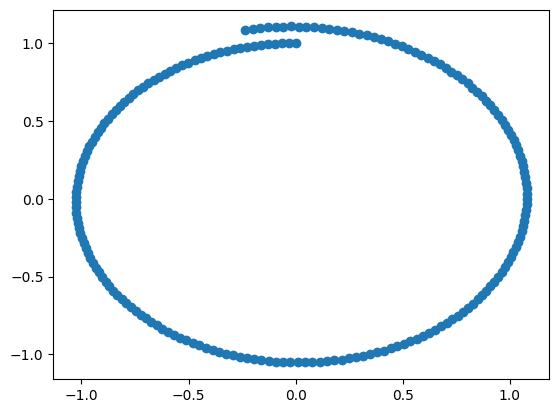

In [18]:
#Exercício 3
import matplotlib.pyplot as plt
import numpy as np

def f(t,x,y):
    return -y

def g(t,x,y):
    return x

a = 0
b = 6.5
N = 200
h = (b - a)/N
x0 = 0
y0 = 1
t = a
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = x0
y[0] = y0

print("Método de Euler Explícito para um sistema de 2 EDOs\n")
for i in range(N):
    x[i+1] = x[i] + h*f(t,x[i],y[i])
    y[i+1] = y[i] + h*g(t,x[i],y[i])
    t = t + h
    #print('x_ap = ', x[i+1], 'y_ap = ', y[i+1])

plt.figure(1)
plt.plot(x, y, 'o')
plt.show()